<a href="https://colab.research.google.com/github/fatin39/FYP/blob/main/user1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

In [ ]:
# upload the CSV file
uploaded = files.upload()

Saving user_1.csv to user_1 (1).csv


In [ ]:
# Read the uploaded CSV file "user_1.csv" into a DataFrame
file_name = "user_1.csv"  # Specify the file name you want to read
df = pd.read_csv(file_name)

# DATA EXPLORATION
# display the first 5 dataset
df.head()

,tweet_id,tweet_text,username,date_posted,label
0,1479645139098288130,everything is a sign if u overthink it enough,farringt0n,2022-01-08T02:44:26.000Z,negative
1,1476277371879792641,she doesn't send me tiktoks anymore. it's over...,farringt0n,2021-12-29T19:42:08.000Z,negative
2,1464416768785592321,time flies when you don't know what the fuck i...,farringt0n,2021-11-27T02:12:19.000Z,negative
3,1452453787269009410,everyday i think 'could it get any worse' then...,farringt0n,2021-10-25T01:55:42.000Z,negative
4,1431795777383305222,last year i was depressed. this year i am even...,farringt0n,2021-08-29T01:48:09.000Z,negative


In [ ]:
df.shape

(247, 5)

In [ ]:
df.isnull().sum() # check for missing values

tweet_id       0
tweet_text     0
username       0
date_posted    0
label          0
dtype: int64

In [ ]:
# Load your dataset into 'df' (assuming you have already done this)

# Now you can perform text preprocessing on the 'tweet_text' column while keeping all other columns intact
def preprocess_text(text):
    # Tokenization and lowercasing
    words = TextBlob(text.lower()).words

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]

    return " ".join(words)

# Apply the preprocess_text function to the 'tweet_text' column while preserving other columns
df["tweet_text"] = df["tweet_text"].apply(preprocess_text)


In [ ]:
df.describe()

,tweet_id
count,2.470000e+02
mean,1.276243e+18
std,4.248051e+16
min,1.212470e+18
25%,1.248875e+18
50%,1.272923e+18
75%,1.294759e+18
max,1.479645e+18


Data Preprocessing

In [ ]:
# DATA PREPROCESSING
# remove punctuation, number from tweets
df["tweet_text"] = df["tweet_text"].str.replace("[^\w\s]", "", regex=True)
df["tweet_text"] = df["tweet_text"].str.replace("\d", "", regex=True)

In [ ]:
# Change all characters in tweets to lower case
df["tweet_text"] = df["tweet_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
# Import Textblob and NLTK for NLP tasks.
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# Tokenization, Lowercasing, and Stopword Removal:

from textblob import TextBlob
from nltk.corpus import stopwords

def preprocess_text(text):
    # Tokenization and lowercasing
    words = TextBlob(text.lower()).words

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]

    return " ".join(words)

# Apply the preprocess_text function to DataFrame
df["tweet_text"] = df["tweet_text"].apply(preprocess_text)

In [ ]:
# Stemming and Lemmatization
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df["tweet_text"] = df["tweet_text"].apply(lambda x: " ".join([stemmer.stem(word) for word in TextBlob(x).words]))

In [ ]:
# Text normalization
normalization_rules = {
    "d1e": "die",
    "di3": "die",
    "depressd": "depressed",
    "sadn3ss": "sadness",
    "lonelyy": "lonely",
    "hurtin": "hurting",
    "selfh4rm": "self-harm",
    "suic1de": "suicide",
    "anxietee": "anxiety",
    "overwhelm3d": "overwhelmed",
    "hop3less": "hopeless",
    "tears": "cry",
    "h4te": "hate",
    "m1serable": "miserable",
    "f33ling": "feeling",
    "despairing": "despair",
    "d33ply": "deeply",
    "helplessss": "helpless",
    "p4in": "pain",
    "enditall": "end it all",
    "l1fe": "life",
    "unh4ppy": "unhappy",
    # Add more rules for variations as needed
}

def normalize_text(text, normalization_rules):
    for key, value in normalization_rules.items():
        text = text.replace(key, value)
    return text

# Apply the text normalization function to your DataFrame
df["tweet_text"] = df["tweet_text"].apply(lambda x: normalize_text(x, normalization_rules))


In [ ]:
# Load your dataset into 'df' (assuming you have already done this)

# Now you can perform text preprocessing on the 'tweet_text' column while keeping all other columns intact
def preprocess_text(text):
    # Tokenization and lowercasing
    words = TextBlob(text.lower()).words

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]

    return " ".join(words)

# Apply the preprocess_text function to the 'tweet_text' column while preserving other columns
df["tweet_text"] = df["tweet_text"].apply(preprocess_text)


In [ ]:
df.head()

,tweet_id,tweet_text,username,date_posted,label
0,1479645139098288130,everyth sign u overthink enough,farringt0n,2022-01-08T02:44:26.000Z,negative
1,1476277371879792641,nt send tiktok anymor lost,farringt0n,2021-12-29T19:42:08.000Z,negative
2,1464416768785592321,time fli nt know fuck happen,farringt0n,2021-11-27T02:12:19.000Z,negative
3,1452453787269009410,everyday think could get wors liter,farringt0n,2021-10-25T01:55:42.000Z,negative
4,1431795777383305222,last year depress year even depress call growth,farringt0n,2021-08-29T01:48:09.000Z,negative


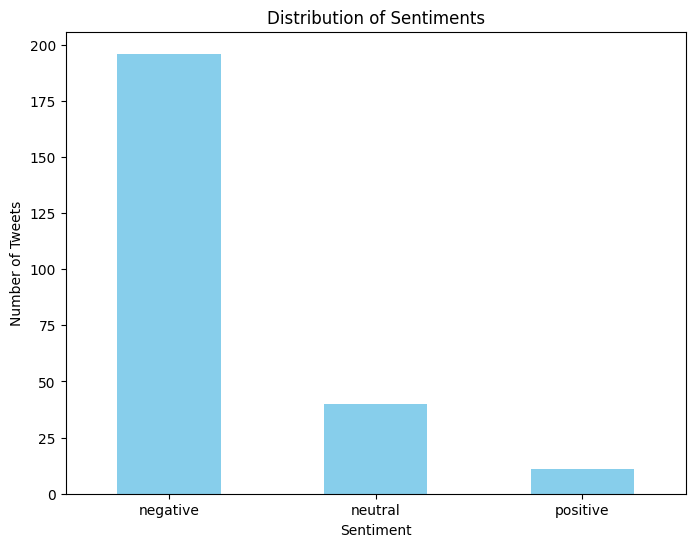

Total number of tweets analyzed for the user: 247


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame 'df' with labeled tweets

# Calculate the distribution of labels (positive, negative, neutral)
label_distribution = df['label'].value_counts()

# Plot the distribution using a bar chart
plt.figure(figsize=(8, 6))
label_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


# Calculate the total number of tweets analyzed for the user 1
total_tweets_for_user = len(df)

# Print the total number of tweets
print(f"Total number of tweets analyzed for the user: {total_tweets_for_user}")



In [ ]:
import pandas as pd

# Convert the 'date_posted' column to a datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'])

# Verify the change
print(df['date_posted'])


0     2022-01-08 02:44:26+00:00
1     2021-12-29 19:42:08+00:00
2     2021-11-27 02:12:19+00:00
3     2021-10-25 01:55:42+00:00
4     2021-08-29 01:48:09+00:00
                 ...           
242   2020-01-07 19:28:51+00:00
243   2020-01-05 22:24:36+00:00
244   2020-01-04 20:53:40+00:00
245   2020-01-03 22:12:48+00:00
246   2020-01-01 20:25:49+00:00
Name: date_posted, Length: 247, dtype: datetime64[ns, UTC]


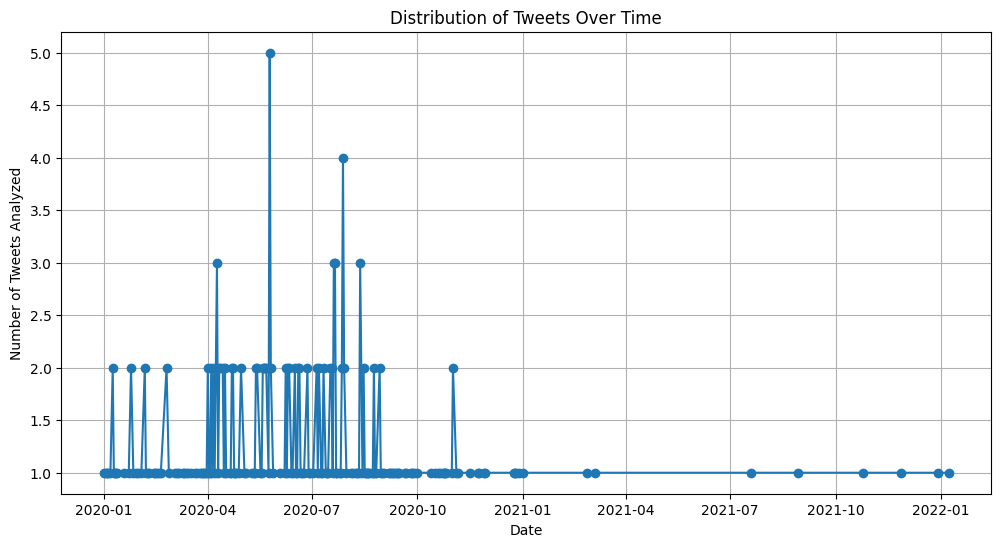

In [ ]:
# Group the data by date and count the number of tweets for each date
tweet_count_by_date = df.groupby(df['date_posted'].dt.date)['tweet_text'].count()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(tweet_count_by_date.index, tweet_count_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Tweets Analyzed')
plt.title('Distribution of Tweets Over Time')
plt.grid()
plt.show()


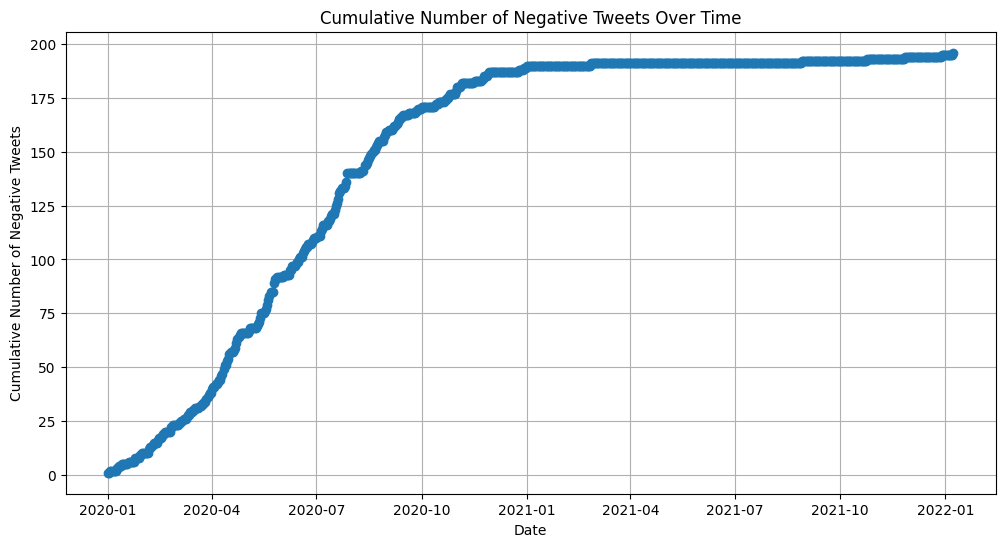

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'date_posted' column and a 'manual_sentiment' column indicating if a tweet is labeled as 'depressed'
# You can adjust these column names according to your dataset

# Convert the 'date_posted' column to a datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'])

# Filter the DataFrame to keep only 'depressed' tweets
depressed_tweets = df[df['label'] == 'negative']

# Group and count the cumulative number of depressed tweets over time
depressed_tweet_counts = depressed_tweets.groupby(pd.Grouper(key='date_posted', freq='D')).size().cumsum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(depressed_tweet_counts.index, depressed_tweet_counts.values, marker='o')
plt.title('Cumulative Number of Negative Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Negative Tweets')
plt.grid(True)

# Show the chart
plt.show()


Persistent sad, anxious, or “empty” mood for at least 2 weeks.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Assuming you already have 'X_train' and 'X_test' as your TF-IDF vectors
# If you don't have them, you can create them like this:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Feature Scaling (Standardization)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_tfidf.toarray())
X_test_scaled = sc.transform(X_test_tfidf.toarray())

# Now you have X_train_scaled and X_test_scaled with TF-IDF features properly scaled.

# Continue with your machine learning algorithms and evaluation.


Classifier: Decision Tree


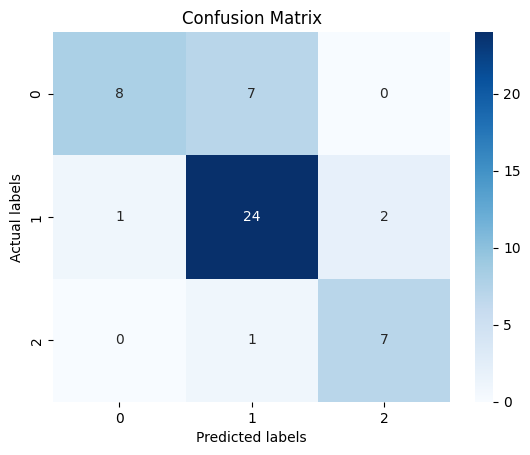

              precision    recall  f1-score   support

    negative       0.89      0.53      0.67        15
     neutral       0.75      0.89      0.81        27
    positive       0.78      0.88      0.82         8

    accuracy                           0.78        50
   macro avg       0.81      0.77      0.77        50
weighted avg       0.80      0.78      0.77        50

Accuracy: 0.780

Classifier: Random Forest


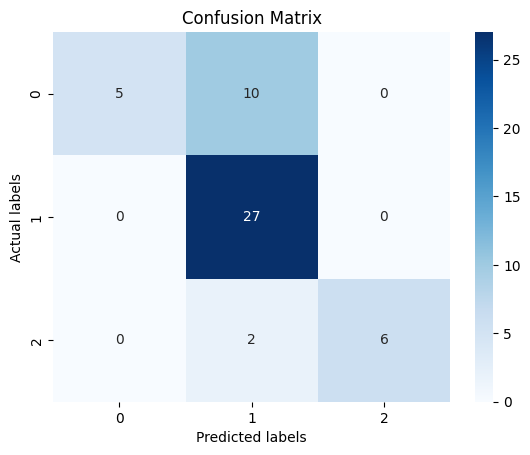

              precision    recall  f1-score   support

    negative       1.00      0.33      0.50        15
     neutral       0.69      1.00      0.82        27
    positive       1.00      0.75      0.86         8

    accuracy                           0.76        50
   macro avg       0.90      0.69      0.73        50
weighted avg       0.83      0.76      0.73        50

Accuracy: 0.760

Classifier: K-Nearest Neighbors


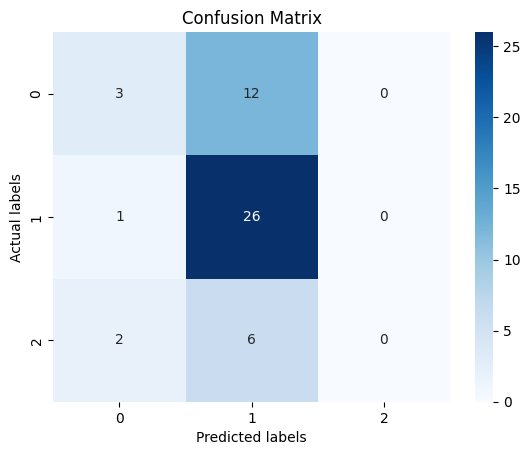

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.50      0.20      0.29        15
     neutral       0.59      0.96      0.73        27
    positive       0.00      0.00      0.00         8

    accuracy                           0.58        50
   macro avg       0.36      0.39      0.34        50
weighted avg       0.47      0.58      0.48        50

Accuracy: 0.580

Classifier: Logistic Regression


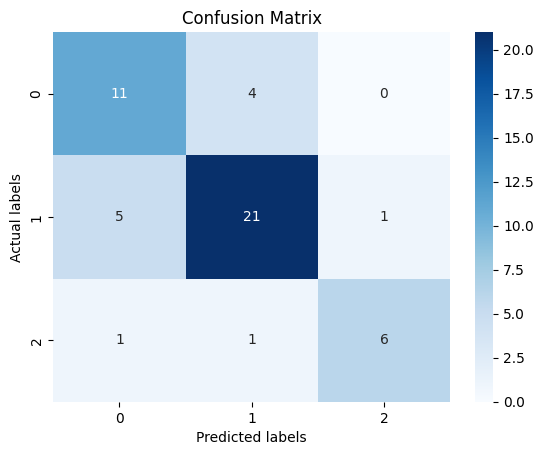

              precision    recall  f1-score   support

    negative       0.65      0.73      0.69        15
     neutral       0.81      0.78      0.79        27
    positive       0.86      0.75      0.80         8

    accuracy                           0.76        50
   macro avg       0.77      0.75      0.76        50
weighted avg       0.77      0.76      0.76        50

Accuracy: 0.760

Classifier: Support Vector Machine


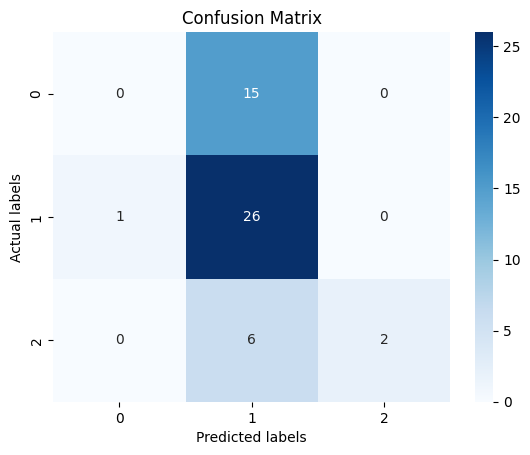

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        15
     neutral       0.55      0.96      0.70        27
    positive       1.00      0.25      0.40         8

    accuracy                           0.56        50
   macro avg       0.52      0.40      0.37        50
weighted avg       0.46      0.56      0.44        50

Accuracy: 0.560



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define and initialize your classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()
svm = SVC()

# Helper function to display a confusion matrix
def disp_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()

# Define the classifiers
classifiers = [
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('K-Nearest Neighbors', knn),
    ('Logistic Regression', logistic_regression),
    ('Support Vector Machine', svm)
]

# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the classifier and print the results
    print(f"Classifier: {clf_name}")
    disp_cm(y_test, y_pred)  # Display confusion matrix
    print(classification_report(y_test, y_pred))  # Print precision, recall, F1-score, and support
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc_score:.3f}\n")


In [ ]:
# Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_

In [ ]:
# Final Model Training

# Train the final Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test_scaled)

In [ ]:
# Deployment
import joblib

# Save the trained model to a file
model_filename = 'random_forest_depression_model.pkl'
joblib.dump(best_rf_model, model_filename)


['random_forest_depression_model.pkl']

<ipython-input-91-171a87be4fec>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


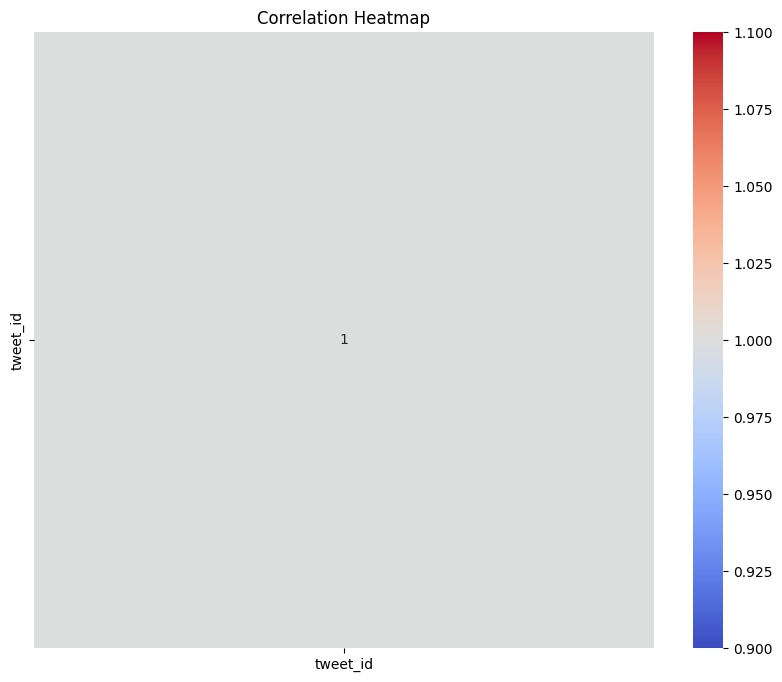

In [ ]:
# Heat map
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


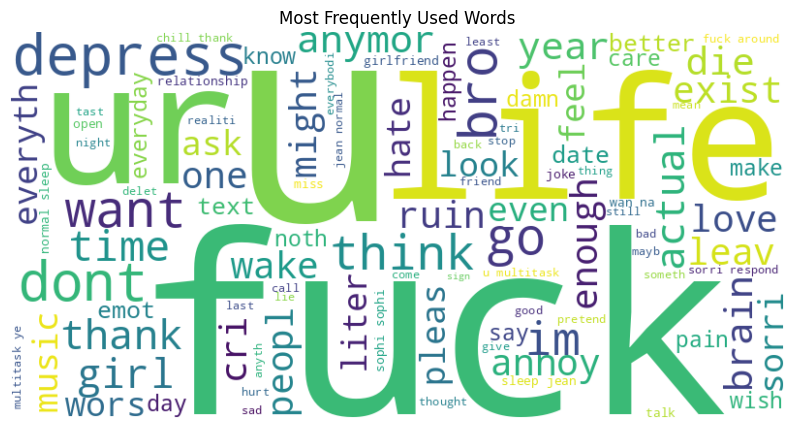

In [ ]:
from wordcloud import WordCloud

# Combine all the tweets into one text
all_text = " ".join(df['tweet_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words')
plt.show()


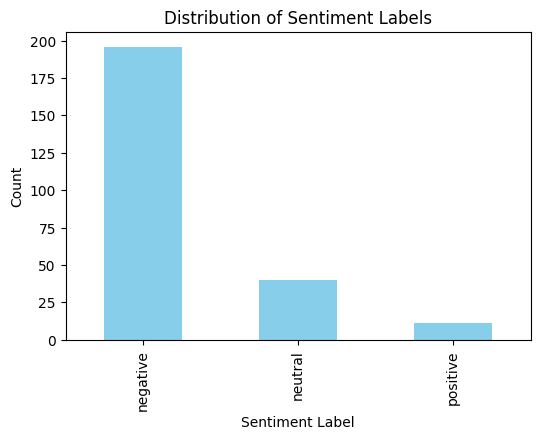

Total number of tweets: 247


In [ ]:
# Calculate the total number of tweets
total_tweets = df.shape[0]

# Calculate the distribution of sentiment labels
sentiment_distribution = df['label'].value_counts()

# Visualize the distribution
plt.figure(figsize=(6, 4))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# Display the total number of tweets
print(f"Total number of tweets: {total_tweets}")
